# Credit Card Fraud Detection

### Context
As presented by the 5th 1056Lab Data Analytics Competition
Fraud detection in financial transactions is one of the most important problems in financial companies.

The original dataset is in Kaggle Datasets.
This data is about fraud detection in credit card transactions. The data was made by credit cards in September 2013 by European cardholders. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
It contains only numerical input variables which are the result of a PCA transformation. The original features and more background information about the data is not provided.
The dataset contains 284,807 instances, 492 instances are fraudulent, the remaining 284,315 instances are genuine.
Training Dat and Test Data
The training data set is the former 198,365 (70%) instances, 383 represents fraud transactions, 197,982 transactions are genuine.
The test data is the later 86,442 (30%) transactions.

## My Approach is quite straitforward

The main issue with this task is the unbalanced data, so i will present two approaches, one with a balanced dataset and the other with the original (unbalanced) dataset.
1. I will do a bit of exploratory data analysis
2. Then do some feature engineering
3. Then Balance the dataset
3. Apply some ML models with default parameters; models like logistic regression, XGboost, SVC, KNN etc.
4. I will examine the accuracy
5. Apply deep learning model, validate then compare the model results
6. Then Make some prediction on the test


## Import the relevant libraries

In [17]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import svm, tree
import xgboost
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import pickle
%matplotlib inline
import datetime 
import time 
import tensorflow as tf


### Load the dataset

In [18]:
# Load the data
data  = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')
submission = test[['ID']]

In [19]:
#display some information about data
data.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198365 entries, 0 to 198364
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      198365 non-null  int64  
 1   Time    198365 non-null  float64
 2   V1      198365 non-null  float64
 3   V2      198365 non-null  float64
 4   V3      198365 non-null  float64
 5   V4      198365 non-null  float64
 6   V5      198365 non-null  float64
 7   V6      198365 non-null  float64
 8   V7      198365 non-null  float64
 9   V8      198365 non-null  float64
 10  V9      198365 non-null  float64
 11  V10     198365 non-null  float64
 12  V11     198365 non-null  float64
 13  V12     198365 non-null  float64
 14  V13     198365 non-null  float64
 15  V14     198365 non-null  float64
 16  V15     198365 non-null  float64
 17  V16     198365 non-null  float64
 18  V17     198365 non-null  float64
 19  V18     198365 non-null  float64
 20  V19     198365 non-null  float64
 21  V20     19

In [20]:
# data.isnull() # shows a df with the information whether a data point is null 
# Since True = the data point is missing, while False = the data point is not missing, we can sum them
# This will give us the total number of missing values feature-wise
data.isnull().sum()

ID        0
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

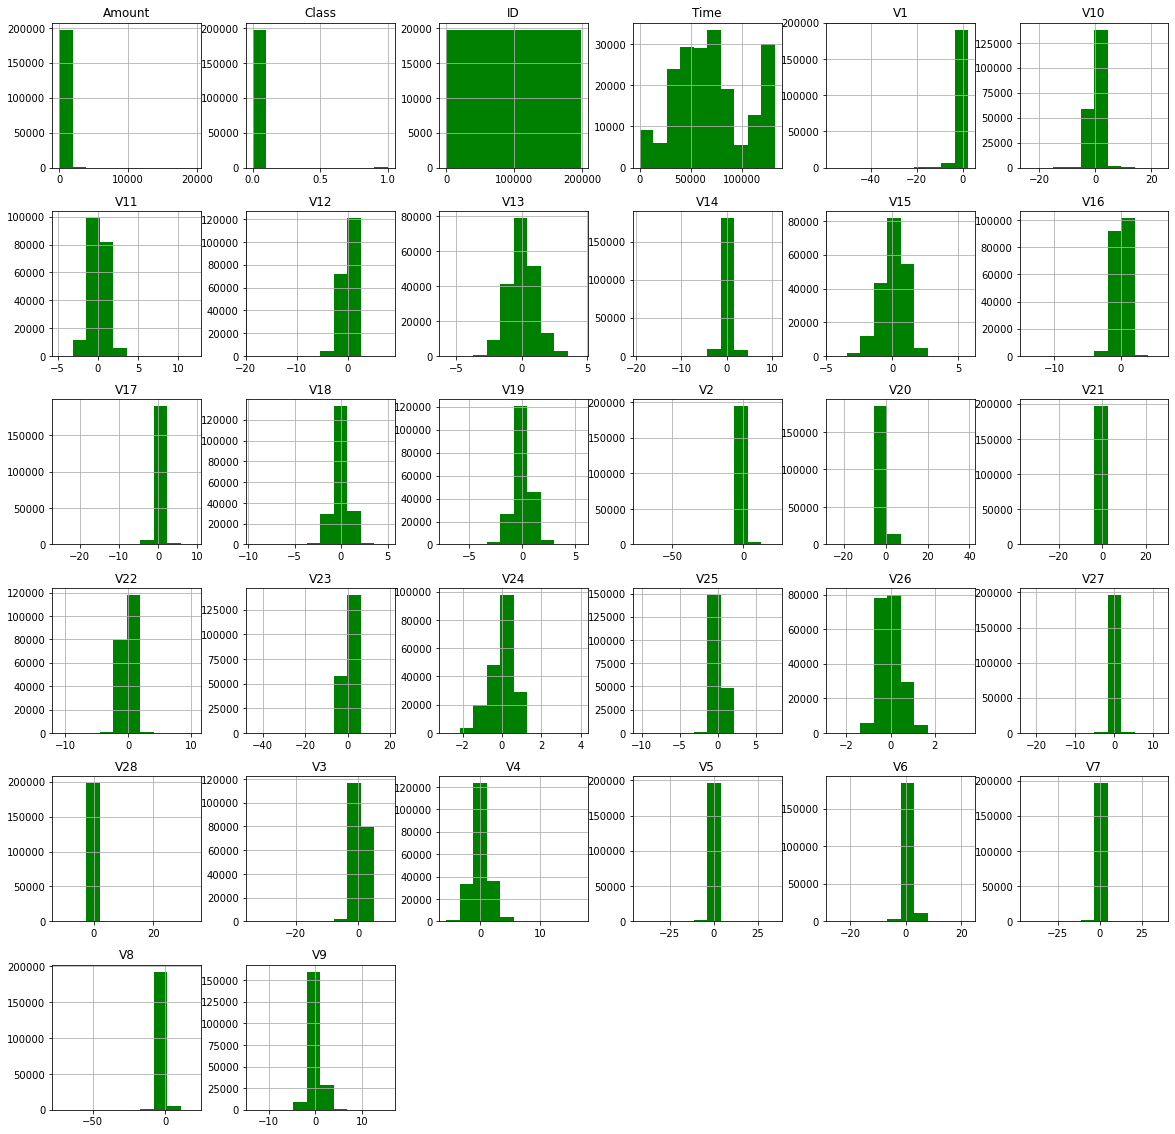

In [21]:
# As we can see there are no missing data

# so let take a look at the spread of each column
# Visulazing the distibution of the data for every feature
data.hist(linewidth=1, histtype='stepfilled', facecolor='g', figsize=(20, 20));

In [22]:
#lets look at the basic description of the data
data.describe()
#test.describe()

,ID,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,...,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000
mean,99183.000000,70130.934414,-0.107339,0.004431,0.325762,0.077514,-0.113668,0.046607,-0.051740,0.017719,...,-0.014966,-0.049185,-0.015766,0.004333,0.061965,0.006424,0.001587,0.001976,89.703525,0.001931
std,57263.187411,34305.103318,1.891453,1.622666,1.446295,1.398805,1.360659,1.310315,1.216025,1.210508,...,0.738678,0.690646,0.610795,0.603471,0.490441,0.488446,0.394026,0.314154,248.680051,0.043898
min,1.000000,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,49592.000000,44128.000000,-0.962685,-0.580147,-0.327270,-0.790975,-0.785452,-0.709602,-0.576733,-0.180360,...,-0.227188,-0.538206,-0.168622,-0.341607,-0.238794,-0.331187,-0.067367,-0.041312,5.990000,0.000000
50%,99183.000000,67005.000000,-0.094105,0.082136,0.496715,0.078139,-0.171469,-0.218506,-0.010989,0.043647,...,-0.043309,-0.035961,-0.029126,0.052775,0.104492,-0.061019,0.006036,0.018528,22.990000,0.000000
75%,148774.000000,90198.000000,1.213058,0.783763,1.225320,0.889229,0.462401,0.444661,0.499504,0.339098,...,0.150027,0.421133,0.114667,0.421534,0.384995,0.261761,0.089128,0.078235,79.200000,0.000000
max,198365.000000,132458.000000,2.454930,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,...,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


## Feature Engineering

Convert Time column into bank of hours in a day

In [23]:
# looking at the datset, we can infer that the datsset contains two days of traction or the record spans a  48hrs period and as 
# such, I have generated the hour of transaction by assuming that the first seconds of a day is 0 and the last one 86399, Hence:

data['HourBank'] = ((np.where(data['Time'] > 86399 , data['Time'] - 86399 , data['Time'])) % (24 *3600) // 3600).astype(int)
test['HourBank'] = ((np.where(test['Time'] > 86399 , test['Time'] - 86399 , test['Time'])) % (24 *3600) // 3600).astype(int)   
#temptime = np.where(data['Time'] > 86399 , data['Time'] - 86399 , data['Time'])
#data['HourBank'] = data['HourBank'].astype(int)
#test['HourBank'] = test['HourBank'].astype(int)
data



,ID,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,HourBank
0,1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,2,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0
2,3,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0
3,4,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0
4,5,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198360,198361,132457.0,-0.474163,1.438815,-0.816746,0.786791,1.067826,-0.207767,1.251817,0.140304,...,0.527323,-0.272449,-1.027952,0.237013,-0.312190,0.304261,0.170698,54.21,0,12
198361,198362,132457.0,1.501100,-2.329402,-0.028328,-0.579340,-2.269449,-0.208058,-1.307538,0.083778,...,-0.112426,0.103570,-0.060057,-0.973943,1.226613,-0.080066,0.009990,314.90,0,12
198362,198363,132458.0,1.957960,-0.677669,-0.395253,0.762448,-0.685747,0.201289,-0.854448,0.198542,...,0.907851,0.061666,0.730593,0.001207,0.568559,-0.009303,-0.047854,14.39,0,12
198363,198364,132458.0,-1.135983,-2.150924,-1.078870,-0.922886,-1.936992,0.819695,3.101553,-0.311864,...,0.629329,1.597087,-0.658563,0.298377,-0.101644,-0.198980,0.084730,804.00,0,12


### Checking the distribution of the targets

In [24]:
data['Class'].groupby(data['Class']).count()

Class
0    197982
1       383
Name: Class, dtype: int64

### Exploring the distribution of the Class and Amount

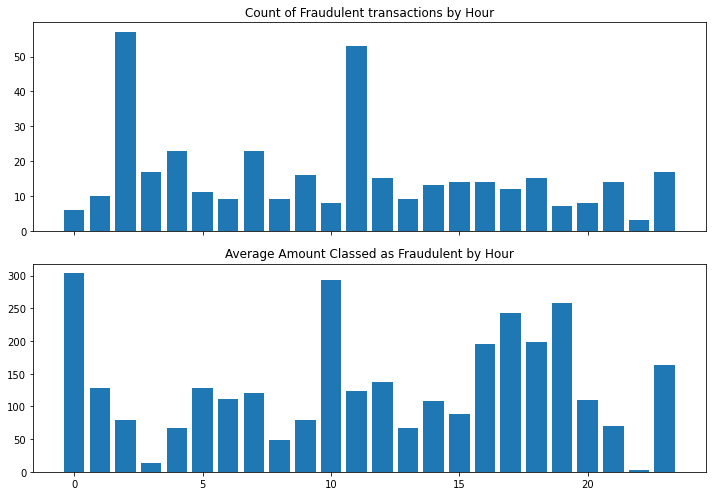

In [25]:
# First we limit the data frame to where a fraudulent activity was identify
d = data[data['Class'] == 1]

# group by HourBank, then count of fradulent transaction
d1 = d[['Class','HourBank']]

d1 = d1.groupby(['HourBank']).count()
d1.reset_index(level=0, inplace=True)

# group by HourBank, then average Amount of fradulent transaction
d2 = d[['Amount','HourBank']]
# group store and dept by average weekly sales
d2 = d2.groupby(['HourBank']).mean()
d2.reset_index(level=0, inplace=True)


#Lets do a quick plot to visualise the data
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(10,7))

ax1.bar(d1.HourBank, d1.Class)
ax1.set_title('Count of Fraudulent transactions by Hour')
ax2.bar(d2.HourBank, d2.Amount)
ax2.set_title('Average Amount Classed as Fraudulent by Hour')

fig.tight_layout()
plt.show()

The plots above shows the distribution of fraudulent transaction over the time(hr) of the day

One Hot Encoding of the Hour Banks

In [26]:
#lets get dummies
T_dummies = pd.get_dummies(data['HourBank'])

#lets merge it
data = pd.concat([data, T_dummies], axis = 1)

# then drop the redundant column
data = data.drop(['HourBank','ID','Time'], axis = 1)


##### Repeat the same for test data

Tt_dummies = pd.get_dummies(test['HourBank'])
a = list(Tt_dummies.columns.values)
b = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22, 23]
c = [x for x in b if x not in a]
Tt_dummies = pd.concat([Tt_dummies, pd.DataFrame(columns = c)]).fillna(0)  
#lets merge it
test = pd.concat([test, Tt_dummies], axis = 1)
# then drop the redundant column
test = test.drop(['HourBank','ID','Time'], axis = 1)


data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,14,15,16,17,18,19,20,21,22,23
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0,0,0,0,0,0,0,0,0,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0,0,0,0,0,0,0,0,0,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0,0,0,0,0,0,0,0,0,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0,0,0,0,0,0,0,0,0,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198360,-0.474163,1.438815,-0.816746,0.786791,1.067826,-0.207767,1.251817,0.140304,-0.903642,-0.286039,...,0,0,0,0,0,0,0,0,0,0
198361,1.501100,-2.329402,-0.028328,-0.579340,-2.269449,-0.208058,-1.307538,0.083778,0.774633,0.584604,...,0,0,0,0,0,0,0,0,0,0
198362,1.957960,-0.677669,-0.395253,0.762448,-0.685747,0.201289,-0.854448,0.198542,1.820618,-0.074209,...,0,0,0,0,0,0,0,0,0,0
198363,-1.135983,-2.150924,-1.078870,-0.922886,-1.936992,0.819695,3.101553,-0.311864,-1.447371,-0.418445,...,0,0,0,0,0,0,0,0,0,0


In [27]:
test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,14,15,16,17,18,19,20,21,22,23
0,2.079192,0.052662,-1.755167,0.418802,0.310472,-0.886053,0.083326,-0.149153,0.721121,-0.334404,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.596563,-1.588177,-1.186718,-1.710578,-0.378661,0.906028,-0.796517,0.443712,2.149723,-0.903409,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.273454,-1.447207,-0.946779,-1.738063,-1.074172,-0.139592,-1.266807,-0.047025,-1.345062,1.713041,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.987406,0.140840,-2.001286,1.071763,0.717042,-0.880590,0.670095,-0.288313,-0.229202,0.553870,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.398751,1.370313,-0.715049,-0.867699,1.157188,-0.364107,1.151124,-0.316554,0.756304,0.843054,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86437,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
86438,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
86439,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
86440,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Shuffle Dataset 

In [28]:
# Balance the data based on column class
g = data.groupby('Class')
g = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
g = g.reset_index(drop=True)

###shuffle dataset
g = g.sample(frac=1).reset_index(drop=True)



,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,14,15,16,17,18,19,20,21,22,23
0,1.158608,-0.682005,0.834863,-0.860150,-1.252565,-0.105402,-0.972816,0.436383,2.047848,-0.860108,...,0,0,0,0,0,0,0,1,0,0
1,1.056601,0.125731,1.338773,2.673969,-0.805437,0.219487,-0.557807,0.287495,-0.102484,0.719404,...,0,0,1,0,0,0,0,0,0,0
2,1.190746,1.265327,-1.477330,1.578233,0.805379,-1.620875,0.685694,-0.259457,-0.738327,-1.385118,...,0,0,0,0,0,0,0,1,0,0
3,-4.312479,1.886476,-2.338634,-0.475243,-1.185444,-2.112079,-2.122793,0.272565,0.290273,-3.833741,...,0,0,0,0,0,0,0,1,0,0
4,-0.887287,1.390002,1.219686,1.661425,1.009228,-0.733908,0.855829,0.000077,-1.275631,-0.433394,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,-5.791495,-5.243817,1.800729,2.720080,2.840993,-1.873182,-1.987863,0.824355,-0.081015,-0.036398,...,0,0,0,0,0,0,0,0,0,0
762,1.113731,-0.038003,1.504975,1.473218,-1.270853,-0.519113,-0.565426,0.070582,0.896623,-0.194678,...,0,0,0,0,0,0,0,1,0,0
763,-2.401980,-1.684031,2.238891,0.577867,-1.270153,0.867902,1.337289,0.380959,-0.400667,-1.088591,...,0,0,1,0,0,0,0,0,0,0
764,1.799034,0.440732,-1.200828,3.405403,1.675520,2.111250,-0.164396,0.412595,-0.014265,1.210987,...,0,0,0,0,0,0,0,0,0,0


### Balance and Standardize the inputs

In [147]:
# The inputs are all columns in the csv, except for the first one [:,0]
# (which is just the arbitrary customer IDs that bear no useful information),
# and the last one [:,-1] (which is our targets)
balanced_inputs = g.drop(['Class'],axis=1)
# The targets are in the last column. That's how datasets are conventionally organized.
balanced_targets = g['Class'].astype(np.int)
unbalanced_inputs = data.drop(['Class'],axis=1)
# The targets are in the last column. That's how datasets are conventionally organized.
unbalanced_targets = data['Class'].astype(np.int)

balanced_inputs = preprocessing.scale(balanced_inputs)
scaled_unbalanced_inputs = preprocessing.scale(unbalanced_inputs)

test_inputsx = preprocessing.scale(test)

shuffled_inputs = balanced_inputs
shuffled_targets = balanced_targets

In [148]:
# Count the total number of samples
samples_count = shuffled_inputs.shape[0]

# Count the samples in each subset, assuming we want 80-10-10 distribution of training, validation, and test.
# Naturally, the numbers are integers.
train_samples_count = int(0.8 * samples_count)
validation_samples_count = int(0.1 * samples_count)

# The 'test' dataset contains all remaining data.
test_samples_count = samples_count - train_samples_count - validation_samples_count

# Create variables that record the inputs and targets for training
# In our shuffled dataset, they are the first "train_samples_count" observations
train_inputs = shuffled_inputs[:train_samples_count]
train_targets = shuffled_targets[:train_samples_count]

# Create variables that record the inputs and targets for validation.
# They are the next "validation_samples_count" observations, folllowing the "train_samples_count" we already assigned
validation_inputs = shuffled_inputs[train_samples_count:train_samples_count+validation_samples_count]
validation_targets = shuffled_targets[train_samples_count:train_samples_count+validation_samples_count]

# Create variables that record the inputs and targets for test.
# They are everything that is remaining.
test_inputs = shuffled_inputs[train_samples_count+validation_samples_count:]
test_targets = shuffled_targets[train_samples_count+validation_samples_count:]

# We balanced our dataset to be 50-50 (for targets 0 and 1), but the training, validation, and test were 
# taken from a shuffled dataset. Check if they are balanced, too. Note that each time you rerun this code, 
# you will get different values, as each time they are shuffled randomly.
# Normally you preprocess ONCE, so you need not rerun this code once it is done.
# If you rerun this whole sheet, the npzs will be overwritten with your newly preprocessed data.

# Print the number of targets that are 1s, the total number of samples, and the proportion for training, validation, and test.
print(np.sum(train_targets), train_samples_count, np.sum(train_targets) / train_samples_count)
print(np.sum(validation_targets), validation_samples_count, np.sum(validation_targets) / validation_samples_count)
print(np.sum(test_targets), test_samples_count, np.sum(test_targets) / test_samples_count)

309 612 0.5049019607843137
37 76 0.4868421052631579
37 78 0.47435897435897434


### Split the unbalanced dataset into train,  and test

In [32]:
#Unbalanced datset
train_test_split(scaled_unbalanced_inputs, unbalanced_targets)
# declare 4 variables for the split
x_train1, x_test1, y_train1, y_test1 = train_test_split(scaled_unbalanced_inputs, unbalanced_targets, #train_size = 0.75, 
                                                                            test_size = 0.25, random_state = 20)


### Quick modelling using Default parameters

In [33]:
#Now, we will create an array of Classifiers and append different classification models to our array
classifiers = [] 

mod1 = xgboost.XGBClassifier()
classifiers.append(mod1)
mod2 = svm.SVC()
classifiers.append(mod2)
mod3 = RandomForestClassifier()
classifiers.append(mod3)
mod4 = LogisticRegression()
classifiers.append(mod4)
mod5 = KNeighborsClassifier(3)
classifiers.append(mod5)
mod6 = AdaBoostClassifier()
classifiers.append(mod6)
mod7= GaussianNB()
classifiers.append(mod7)

In [36]:
#Lets fit the models into anarray

for clf in classifiers:
    clf.fit(train_inputs,train_targets)
    y_pred= clf.predict(test_inputs)
    y_tr = clf.predict(train_inputs)
    acc_tr = accuracy_score(train_targets, y_tr)
    acc = accuracy_score(test_targets, y_pred)
    mn = type(clf).__name__
    
    print(clf)
    print("Accuracy of trainset %s is %s"%(mn, acc_tr))
    print("Accuracy of testset %s is %s"%(mn, acc))
    cm = confusion_matrix(test_targets, y_pred)
    print("Confusion Matrix of testset %s is %s"%(mn, cm))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Accuracy of trainset XGBClassifier is 1.0
Accuracy of testset XGBClassifier is 0.8974358974358975
Confusion Matrix of testset XGBClassifier is [[37  4]
 [ 4 33]]
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking

### Deep Learning Modelling
Outline, optimizers, loss, early stopping and training

In [38]:
# convert all value into array
validation_inputs = np.array(validation_inputs)
validation_targets = np.array(validation_targets)
train_targets = np.array(train_targets)
train_inputs = np.array(train_inputs)

In [133]:
# Set the input and output sizes
input_size = 53
output_size = 2
# Use same hidden layer size for both hidden layers. Not a necessity.
hidden_layer_size = 6
    
# define how the model will look like
model = tf.keras.Sequential([
    # tf.keras.layers.Dense is basically implementing: output = activation(dot(input, weight) + bias)
    # it takes several arguments, but the most important ones for us are the hidden_layer_size and the activation function
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 1st hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
    # the final layer is no different, we just make sure to activate it with softmax
    tf.keras.layers.Dense(output_size, activation='softmax') # output layer
])


### Choose the optimizer and the loss function

# we define the optimizer we'd like to use, 
# the loss function, 
# and the metrics we are interested in obtaining at each iteration
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Training
# That's where we train the model we have built.

# set the batch size
batch_size = 100

# set a maximum number of training epochs
max_epochs = 100

# set an early stopping mechanism
# let's set patience=2, to be a bit tolerant against random validation loss increases
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

# fit the model
# note that this time the train, validation and test data are not iterable
history = model.fit(train_inputs, # train inputs
          train_targets, # train targets
          batch_size=batch_size, # batch size
          epochs=max_epochs, # epochs that we will train for (assuming early stopping doesn't kick in)
          # callbacks are functions called by a task when a task is completed
          # task here is to check if val_loss is increasing
          callbacks=[early_stopping], # early stopping
          validation_data=(validation_inputs, validation_targets), # validation data
          verbose = 2 # making sure we get enough information about the training process
          )  

Train on 612 samples, validate on 76 samples
Epoch 1/100
612/612 - 1s - loss: 0.6909 - accuracy: 0.5196 - val_loss: 0.6889 - val_accuracy: 0.6316
Epoch 2/100
612/612 - 0s - loss: 0.6881 - accuracy: 0.6618 - val_loss: 0.6871 - val_accuracy: 0.6053
Epoch 3/100
612/612 - 0s - loss: 0.6849 - accuracy: 0.6536 - val_loss: 0.6840 - val_accuracy: 0.6842
Epoch 4/100
612/612 - 0s - loss: 0.6810 - accuracy: 0.6732 - val_loss: 0.6806 - val_accuracy: 0.6842
Epoch 5/100
612/612 - 0s - loss: 0.6758 - accuracy: 0.6977 - val_loss: 0.6768 - val_accuracy: 0.6711
Epoch 6/100
612/612 - 0s - loss: 0.6689 - accuracy: 0.7206 - val_loss: 0.6710 - val_accuracy: 0.6842
Epoch 7/100
612/612 - 0s - loss: 0.6590 - accuracy: 0.7386 - val_loss: 0.6639 - val_accuracy: 0.7368
Epoch 8/100
612/612 - 0s - loss: 0.6462 - accuracy: 0.7533 - val_loss: 0.6541 - val_accuracy: 0.7500
Epoch 9/100
612/612 - 0s - loss: 0.6308 - accuracy: 0.7696 - val_loss: 0.6416 - val_accuracy: 0.7500
Epoch 10/100
612/612 - 0s - loss: 0.6132 - acc

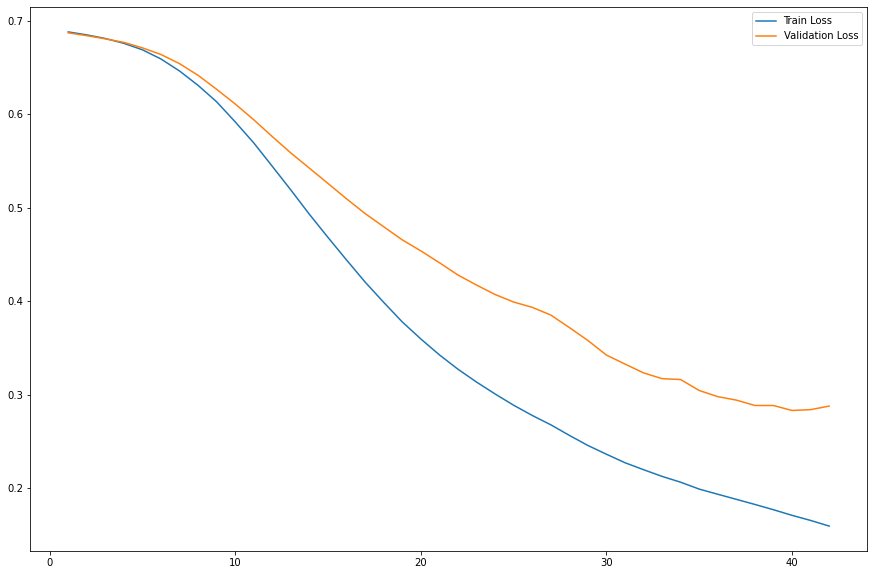

In [135]:

# Plot the train/validation loss values
plt.figure(figsize=(15,10))
_loss = history.history['loss'][1:]
_val_loss = history.history['val_loss'][1:]

train_loss_plot, = plt.plot(range(1, len(_loss)+1), _loss, label='Train Loss')
val_loss_plot, = plt.plot(range(1, len(_val_loss)+1), _val_loss, label='Validation Loss')

_ = plt.legend(handles=[train_loss_plot, val_loss_plot])

## Test the model

After training on the train data and validating on the validation data, we test the final prediction power of our model by running it on the test dataset that the algorithm has NEVER seen before.


In [136]:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)

78/78 [==============================] - 0s 109us/sample - loss: 0.3087 - accuracy: 0.9103


## Apply Deep Learning Model to hthe unbalanced dataset

In [138]:
#first lets convert the inputs to array
y_train1 = np.array(y_train1)
y_test1 = np.array(y_test1)

In [139]:
# Set the input and output sizes
input_size = 53
output_size = 2
# Use same hidden layer size for both hidden layers. Not a necessity.
hidden_layer_size = 2
    
# define how the model will look like
tfk = tf.keras.Sequential([
    # tf.keras.layers.Dense is basically implementing: output = activation(dot(input, weight) + bias)
    # it takes several arguments, but the most important ones for us are the hidden_layer_size and the activation function
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 1st hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
    # the final layer is no different, we just make sure to activate it with softmax
    tf.keras.layers.Dense(output_size, activation='softmax') # output layer
])


### Choose the optimizer and the loss function

# we define the optimizer we'd like to use, 
# the loss function, 
# and the metrics we are interested in obtaining at each iteration
tfk.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Training
# That's where we train the model we have built.

# set the batch size
batch_size = 100

# set a maximum number of training epochs
max_epochs = 100

# set an early stopping mechanism
# let's set patience=2, to be a bit tolerant against random validation loss increases
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

# fit the model
# note that this time the train, validation and test data are not iterable
history = tfk.fit(x_train1, # train inputs
          y_train1, # train targets
          batch_size=batch_size, # batch size
          epochs=max_epochs, # epochs that we will train for (assuming early stopping doesn't kick in)
          # callbacks are functions called by a task when a task is completed
          # task here is to check if val_loss is increasing
          callbacks=[early_stopping], # early stopping
          validation_data=(x_test1, y_test1), # validation data
          verbose = 2 # making sure we get enough information about the training process
          )  

Train on 148773 samples, validate on 49592 samples
Epoch 1/100
148773/148773 - 5s - loss: 0.0967 - accuracy: 0.9980 - val_loss: 0.0100 - val_accuracy: 0.9983
Epoch 2/100
148773/148773 - 3s - loss: 0.0117 - accuracy: 0.9980 - val_loss: 0.0092 - val_accuracy: 0.9983
Epoch 3/100
148773/148773 - 3s - loss: 0.0106 - accuracy: 0.9980 - val_loss: 0.0081 - val_accuracy: 0.9983
Epoch 4/100
148773/148773 - 4s - loss: 0.0093 - accuracy: 0.9980 - val_loss: 0.0078 - val_accuracy: 0.9983
Epoch 5/100
148773/148773 - 4s - loss: 0.0080 - accuracy: 0.9980 - val_loss: 0.0051 - val_accuracy: 0.9983
Epoch 6/100
148773/148773 - 5s - loss: 0.0046 - accuracy: 0.9981 - val_loss: 0.0035 - val_accuracy: 0.9993
Epoch 7/100
148773/148773 - 4s - loss: 0.0036 - accuracy: 0.9993 - val_loss: 0.0034 - val_accuracy: 0.9993
Epoch 8/100
148773/148773 - 4s - loss: 0.0035 - accuracy: 0.9993 - val_loss: 0.0034 - val_accuracy: 0.9994
Epoch 9/100
148773/148773 - 4s - loss: 0.0034 - accuracy: 0.9993 - val_loss: 0.0033 - val_acc

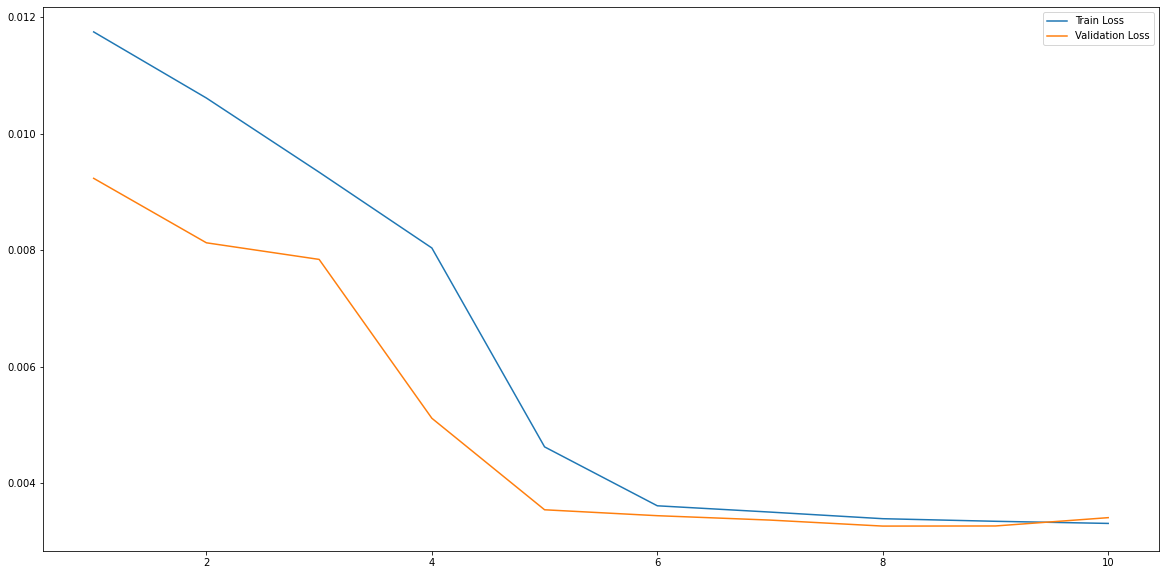

In [140]:

# Plot the train/validation loss values
plt.figure(figsize=(20,10))
_loss = history.history['loss'][1:]
_val_loss = history.history['val_loss'][1:]

train_loss_plot, = plt.plot(range(1, len(_loss)+1), _loss, label='Train Loss')
val_loss_plot, = plt.plot(range(1, len(_val_loss)+1), _val_loss, label='Validation Loss')

_ = plt.legend(handles=[train_loss_plot, val_loss_plot])

## Make Prediction on Test data
Apply afew of the models to the test data to make preictions.

In [151]:
tfbalanced = model.predict_classes(test_inputsx) # Deep learning with balanced data
tfunbalanced = tfk.predict_classes(test_inputsx)  # Deep Learning with unbalanced data
logreg = mod4.predict(test_inputsx)              # Logistic regression with balanced data
ada = mod6.predict(test_inputsx)            # Adaboost with balanced data

In [152]:
#df = pd.DataFrame(pred, columns=['Prediction'])
submission['tfb'] = tfbalanced          # the AUC score = 54
submission['tfu'] = tfunbalanced        # the AUC score = 0.89
submission['logr'] = logreg             # the AUC score = 57
submission['ada'] = ada                 # the AUC score = 63

In [153]:
submission.to_csv('submission.csv', index=False)

The best model seem to be the tfk model,
which is the model with the unbalanced dataset
The model generated an AUC score of 0.89277.
So this project gives different ways of adressing the task, with balanced and unbalanced data.
Using deep learning, KNN, SVC, Adaboost, SGboostClassifier, Logistic Regression, GaussianNB and Random Foret